## Qustion 1

- Imported needed library’s and created a data frame to do normalization techniques on.

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(0,100,size=(25, 4)), columns=list('ABCD'))
df['E'] = 2
df.head()

,A,B,C,D,E
0,37,41,7,74,2
1,11,17,21,88,2
2,70,9,36,85,2
3,39,5,94,86,2
4,65,70,90,31,2


- Created a z score function so I could normalize the data. If the standard deviation is zero that means the values are constant and the original values are returned.

In [2]:
def z_score(x):
    mean = np.mean(x)
    std = np.std(x)
    if std == 0:
        return(x)
    else:
        y = (x - mean)/std
        return(y)

In [3]:
z_score(df.E).head(5)

0    2
1    2
2    2
3    2
4    2
Name: E, dtype: int64

- When implementing column E in the z_score function the result was NaN. Python doesn’t allow for numbers to  be divided by zero. But the z_score for a constant value in a column will be zero because all values are the same. The standard deviation will be zero and the x-value minus the mean will be zero also. For column E the original data was returned. 



- Using the apply function I normalized the data with the z score function I created above

In [4]:
zscore_df = df[['A','B','C','D','E']].apply(z_score)
zscore_df.head(10)

,A,B,C,D,E
0,-0.189412,0.061086,-1.139337,0.721514,2
1,-0.983721,-0.811568,-0.692788,1.201609,2
2,0.818749,-1.102452,-0.214343,1.098731,2
3,-0.128311,-1.247895,1.635643,1.133024,2
4,0.665997,1.115542,1.508058,-0.753063,2
5,-0.892070,1.733672,0.997717,0.104249,2
6,-0.617117,-0.484323,-0.724684,0.344297,2
7,-0.861520,0.933739,0.710650,0.790099,2
8,-0.922620,-1.393337,-1.330714,-0.821648,2
9,1.521407,0.133807,-1.011751,0.069957,2


- Created a min,max normalization function so I could normalize the data. If the min and the max are equal the values are constant and the original values are returned.

In [6]:
def max_min_nor(x):
    max1 = np.max(x)
    min1 = np.min(x)
    if min1 == max1:
        return(x)
    else:
        y = (x - min1)/(max1 - min1)
        return(y)

In [7]:
max_min_nor(df.E).head()

0    2
1    2
2    2
3    2
4    2
Name: E, dtype: int64

- When implementing column E in the max-min normalization function the results were NaN. Python doesn’t allow for numbers to be divided by zero. But the max-min normalization for a constant value in a column will be zero because all values are the same. The max and the min for this case will be 2 and when put in the function the score is zero or NaN. Once again the original data was returned for column E. 




- Using the apply function I normalized the data with the min,max normalization function I created above.

In [8]:
max_min_df = df[['A','B','C','D','E']].apply(max_min_nor)
max_min_df.head(10)

,A,B,C,D,E
0,0.375000,0.431579,0.062500,0.756098,2
1,0.104167,0.178947,0.208333,0.926829,2
2,0.718750,0.094737,0.364583,0.890244,2
3,0.395833,0.052632,0.968750,0.902439,2
4,0.666667,0.736842,0.927083,0.231707,2
5,0.135417,0.915789,0.760417,0.536585,2
6,0.229167,0.273684,0.197917,0.621951,2
7,0.145833,0.684211,0.666667,0.780488,2
8,0.125000,0.010526,0.000000,0.207317,2
9,0.958333,0.452632,0.104167,0.524390,2


## Qustion 2

#### Continuous:

- Created a data frame for the continuous data given

In [9]:
Pred = [2, 0.5, 0.7, 0.3, 0.6, 1, 3, 4, 0.2, 0.8, 2.2, 3.5]
Act = [2.1, 0.5, 0.6, 0.3, 0.6, 1.2, 2.8, 4, 0.1, 0.7, 2.2, 3.5]
df2 = pd.DataFrame({"Pred": Pred, "Act":Act})
df2

,Pred,Act
0,2.0,2.1
1,0.5,0.5
2,0.7,0.6
3,0.3,0.3
4,0.6,0.6
5,1.0,1.2
6,3.0,2.8
7,4.0,4.0
8,0.2,0.1
9,0.8,0.7


### Mean Squared Error

- n = Number of training examples
- i = ith training example in a data set
- y = Actual in training Example
- y_pred = Prediction in training example
- Summation = Sum of all instances

**MSE = Summation(( y_pred**i - **y**i **)^2) /n**




- Created a new column called squared error which is the difference between Pred and Act squared. Then found the mean to get the Mean Squared Error.

In [10]:
df2["squared_error"] = (df2["Pred"] - df2["Act"])**2
print("MSE:", np.mean(df2.squared_error))

MSE: 0.010000000000000007


### Mean Absolute Error

- n = Number of training examples
- i = ith training example in a data set
- y = Actual in training Example
- y_pred = Prediction in training example
- Summation = Sum of all instances

**MAE = Summation(abs( y_pred**i - **y**i **)) /n**




 - Created a new column called Abs_error which is the absolute difference between Act and Pred. Then found the mean to get the Mean Absolute Error.

In [11]:
df2["Abs_error"] = abs(df2["Pred"] - df2["Act"])
print("MAE:", np.mean(df2.Abs_error))

MAE: 0.0666666666666667


### Root Mean Squared Error

- n = Number of training examples
- i = ith training example in a data set
- y = Actual in training Example
- y_pred = Prediction in training example
- Summation = Sum of all instances

**RMSE = Square_root( Summation(( y_pred**i - **y**i )**^2) /n )**



 - Took the mean of the squared error and then used the square root function on the mean to get the Root Mean Squared Error. 

In [12]:
mse = np.mean(df2.squared_error)
print("RMSE:", np.sqrt(mse))

RMSE: 0.10000000000000003


### Mean Bias Error

- n = Number of training examples
- i = ith training example in a data set
- y = Actual in training Example
- y_pred = Prediction in training example
- Summation = Sum of all instances

**MBE = Summation( y_pred**i - **y**i )**/n**



 - Created a new column called Error which is the difference between Pred and Act. Next I found the mean of the error column to get the Mean Bias Error.

In [13]:
df2["Error"] = df2["Pred"] - df2["Act"]

In [14]:
print("MBE:", np.mean(df2.Error))

MBE: 0.016666666666666684


##### Binary Classification:

In [15]:
# Create a data frame with the binary classification data.
Predicted = [1,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0]
Actual = [1,1,0,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0]

In [16]:
df3 = pd.DataFrame({"Predicted": Predicted, "Actual":Actual})
df3.head()

,Predicted,Actual
0,1,1
1,0,1
2,0,0
3,1,0
4,1,1


- Computed the mean squared error for the binary classification data. In a binary classification problem the mean squared error is the same as the error rate which is 1 - accuracy. If there are more than two levels being classified the mean squared error does not equal the error rate. 

In [17]:
df3["squared_error"] = (df3["Predicted"] - df3["Actual"])**2
print("MSE:", np.mean(df3.squared_error))

MSE: 0.2777777777777778


## Qustion 3

### Leakage

Leakage is when unexpected additional information from outside the training data set is used to create the machine learning model. The unexpected information allows the model to learn something that the model should not have learned, which would invalidate the model that is being created. Leakage makes the model look accurate up intell the time of actually making decisions with the model and then the model becomes inaccurate.  

### Bias

Bias in machine learning occurs when a machine learning algorithm that shows results that are prejdiced because of assumptions made when in the machine learning process. The bias can come from people who favor something consciously or unconsciously that may go undetected until the algorithm is being used. Other kinds of bias are sample bias which is when the data that is training the machine learning algorithm does not accurately represent the whole of the data. Having sample bias will cause the model to be bias to one type of situation. For example with a self-driving car they only have videos during the day to train the model, which makes the model bias to the day because they never trained with night videos. 

### Non-Stationary

Non-stationary is data that has means, variances, and covariances that change over time. Non-Stationary data happens in time series data and is very difficult to model. Before forecasting this data the non-stationary data needs to be converted into stationary data. This is done because if the series is always increasing over time, the mean and variance will be growing with the size of the sample, and that could cause an underestimated mean and variance in coming time periods. Stationary data has a constant mean and variance independent of time.   

## Qustion 4 

### A

 - Imported one of python’s visualization librarys

In [18]:
import matplotlib.pyplot as plt

 - Created a data frame with the two arrays given

In [19]:
x = [ 0.00000000,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.00000000]
f_x = [ 1.22936814,  1.00485822,  1.035028  ,  1.02244241,  1.07089034,
        1.16700912,  1.09192042,  1.17774764,  0.99953525,  1.10983151,
        1.07545041,  0.9353099 ,  0.90749053,  1.06833571,  0.92796884,
        0.98931315,  0.89613637,  0.87322689,  0.70581373,  0.67569483]
df4 = pd.DataFrame({"x": x, "f_x":f_x})
df4.head()

,x,f_x
0,0.000000,1.229368
1,0.052632,1.004858
2,0.105263,1.035028
3,0.157895,1.022442
4,0.210526,1.070890


Text(0.5,1,'Scatter')

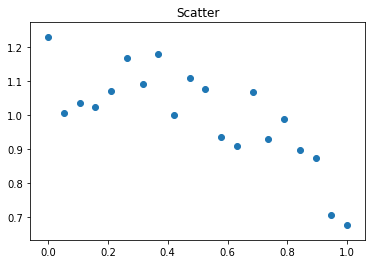

In [20]:
# Scatter plot of x vs. f(x)
plt.scatter(x = df4.x, y = df4.f_x)
plt.title("Scatter")

#### Polynomial with 2 degrees with a scatter plot that has a polynomial  line

In [21]:
p2 = np.polyfit(df4.x, df4.f_x,2)
print("Coffcients: \n", "Slope =",p2[0],"\n", "Intercepts =", p2[1:3])

Coffcients: 
 Slope = -0.6315807591772846 
 Intercepts = [0.28208516 1.07319309]


Text(0.5,1,'Degree = 2')

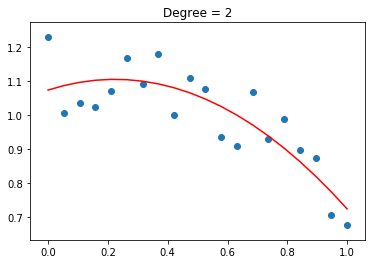

In [22]:
plt.scatter(x = df4.x, y = df4.f_x)
plt.plot(df4.x,np.polyval(p2,df4.x), 'r-')
plt.title("Degree = 2")

 - Underfit a little 

#### Polynomial  with 3 degrees with a scatter plot that has a polynomial  line 

In [23]:
p3 = np.polyfit(df4.x, df4.f_x,3)
print("Coffcients: \n", "Slope =",p3[0],"\n" "Intercepts =", p3[1:4])

Coffcients: 
 Slope = -1.1261690032041576 
Intercepts = [ 1.05767275 -0.37645854  1.12092269]


Text(0.5,1,'Degree = 3')

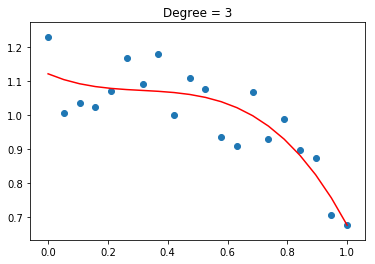

In [24]:
plt.scatter(x = df4.x, y = df4.f_x)
plt.plot(df4.x,np.polyval(p3,df4.x), 'r-')
plt.title("Degree = 3")

 - All most perfect 

#### Polynomial with 4 degrees with a scatter plot that has a polynomial  line

In [25]:
p4 = np.polyfit(df4.x, df4.f_x,4)
print("Coffcients: \n", "Slope =",p4[0],"\n" "Intercepts =", p4[1:5])

Coffcients: 
 Slope = 0.9534074974541532 
Intercepts = [-3.032984    2.26386339 -0.62924169  1.13064482]


Text(0.5,1,'Degree = 4')

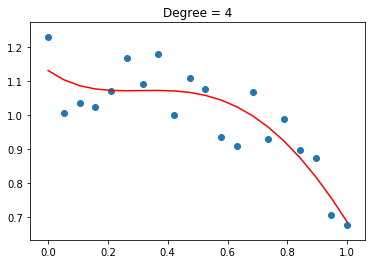

In [26]:
plt.scatter(x = df4.x, y = df4.f_x)
plt.plot(df4.x,np.polyval(p4,df4.x), 'r-')
plt.title("Degree = 4")

 - The best fit out of all of the plots

#### Polynomial  with 6 degrees with a scatter plot that has a polynomial  line

In [27]:
p6 = np.polyfit(df4.x, df4.f_x,6)
print("Coffcients: \n", "Slope =",p6[0], "\n","Intercepts =", p6[1:7])

Coffcients: 
 Slope = 80.85271924070871 
 Intercepts = [-269.35143615  341.38208825 -204.54124606   57.43921775   -6.34613005
    1.2268951 ]


Text(0.5,1,'Degree = 6')

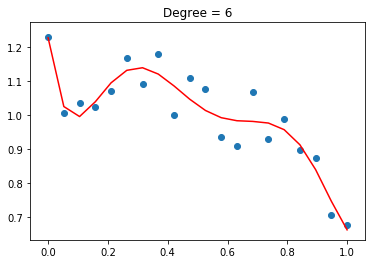

In [28]:
plt.scatter(x = df4.x, y = df4.f_x)
plt.plot(df4.x,np.polyval(p6,df4.x), 'r-')
plt.title("Degree = 6")

 - Starting to see some overfiting to the data

#### Polynomial  with 8 degrees with a scatter plot that has a polynomial  line

In [30]:
p8 = np.polyfit(df4.x, df4.f_x,8)
print("Coffcients: \n",
      "Slope = ",p8[0],"\n",
      "Intercepts =", p8[1:9])

Coffcients: 
 Slope =  415.90066083702055 
 Intercepts = [-1.59128242e+03  2.53419686e+03 -2.21765763e+03  1.18544577e+03
 -3.98386723e+02  7.83306904e+01 -7.10001621e+00  1.22670687e+00]


Text(0.5,1,'Degree = 8')

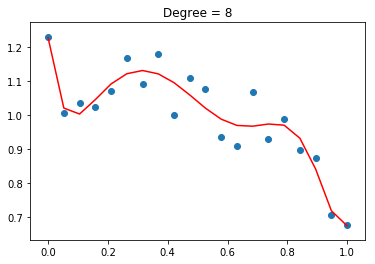

In [31]:
plt.scatter(x = df4.x, y = df4.f_x)
plt.plot(df4.x,np.polyval(p8,df4.x), 'r-')
plt.title("Degree = 8")

 - Around the same as 6 degrees

#### Polynomial  with 15 degrees with a scatter plot that has a polynomial  line

In [32]:
p15 = np.polyfit(df4.x, df4.f_x,15)
print("Coffcients: \n",
      "Slope = ",p15[0],"\n",
      "Intercepts =", p15[1:16])

Coffcients: 
 Slope =  -1618208.782051038 
 Intercepts = [ 7.00700490e+06 -5.43543164e+06 -2.76024049e+07  9.05611981e+07
 -1.36359594e+08  1.26740981e+08 -7.87305730e+07  3.35215648e+07
 -9.77015889e+06  1.90668843e+06 -2.37815334e+05  1.73463171e+04
 -6.00292697e+02  2.63958244e+00  1.22934301e+00]


Text(0.5,1,'Degree = 15')

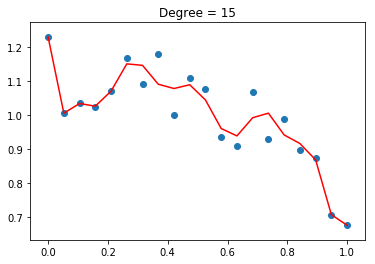

In [33]:
plt.scatter(x = df4.x, y = df4.f_x)
plt.plot(df4.x,np.polyval(p15,df4.x), 'r-')
plt.title("Degree = 15")

 - Overfit to the data

## B

 - Created two random arrays x and y for 50 data points that was turned in to a data frame.

In [34]:
x = np.random.uniform(-1,1, size = 50)
noise = np.random.random_sample(50)
y = 0.4*x + 3 + noise

In [35]:
df5 = pd.DataFrame({"x": x, "y":y})
df5.head()

,x,y
0,-0.951403,2.654285
1,-0.526168,3.661387
2,0.792656,3.941978
3,-0.965677,3.139740
4,0.197095,3.286392


In [36]:
## spliting of the data
## 10 points
p10 = df5.iloc[0:10]
## 20 points
p20 = df5.iloc[0:20]
## 30 points
p30 = df5.iloc[0:30]
## 40 points
p40 = df5.iloc[0:40]
## 50 points
p50 = df5.iloc[0:50]

#### 10 DATA POINTS

In [37]:
# Created a new data frame 10 points
df_1 = p10.sort_values("x").reset_index()
df_1 = df_1.drop(["index"], axis = 1)
df_1

,x,y
0,-0.965677,3.139740
1,-0.951403,2.654285
2,-0.643560,2.792478
3,-0.526168,3.661387
4,-0.435685,3.453439
5,0.076717,3.864843
6,0.084827,3.803327
7,0.197095,3.286392
8,0.305464,3.317638
9,0.792656,3.941978


In [38]:
# fit of the polynomial line
n10 = np.polyfit(df_1.x, df_1.y,5)
n10

array([-5.6915447 ,  3.35038484,  8.37842892, -3.32172922, -2.04712484,
        3.93752804])

([<matplotlib.axis.XTick at 0x110074278>,
 <a list of 3 Text xticklabel objects>)

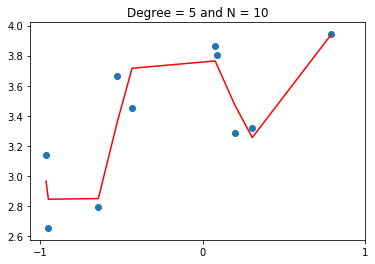

In [39]:
# Scatter plot with polynomial line
plt.scatter(df_1.x,df_1.y)
plt.plot(df_1.x, np.polyval(n10,df_1.x), 'r-')
plt.title("Degree = 5 and N = 10")
plt.xticks([-1,0,1])

#### 20 DATA POINTS

In [40]:
# Created a new data frame 20 points
df_2 = p20.sort_values("x").reset_index()
df_2 = df_2.drop(["index"], axis = 1)
df_2.head()

,x,y
0,-0.965677,3.139740
1,-0.951403,2.654285
2,-0.937780,2.887960
3,-0.663619,3.702406
4,-0.643560,2.792478


In [41]:
# fit of the polynomial line
n20 = np.polyfit(df_2.x, df_2.y,5)
n20

array([ 1.81920591,  2.08585636, -0.01986352, -1.27849909, -0.22186606,
        3.54375955])

([<matplotlib.axis.XTick at 0x11012af60>,
 <a list of 3 Text xticklabel objects>)

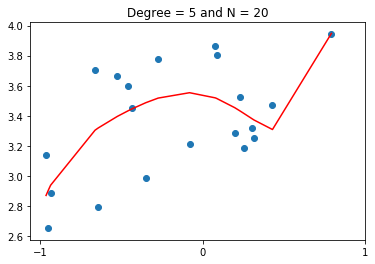

In [42]:
# Scatter plot with polynomial line
plt.scatter(df_2.x,df_2.y)
plt.plot(df_2.x, np.polyval(n20,df_2.x), 'r-')
plt.title("Degree = 5 and N = 20")
plt.xticks([-1,0,1])

#### 30 DATA POINTS

In [43]:
# Created a new data frame 30 points
df_3 = p30.sort_values("x").reset_index()
df_3 = df_3.drop(["index"], axis = 1)
df_3.head()

,x,y
0,-0.974404,3.410058
1,-0.965677,3.139740
2,-0.951403,2.654285
3,-0.937780,2.887960
4,-0.742159,3.669412


In [44]:
# fit of the polynomial line
n30 = np.polyfit(df_3.x, df_3.y,5)
n30

array([-1.37657443, -0.62075456,  2.11653193,  0.59264982, -0.31677151,
        3.48266374])

([<matplotlib.axis.XTick at 0x1101e4c88>,
 <a list of 3 Text xticklabel objects>)

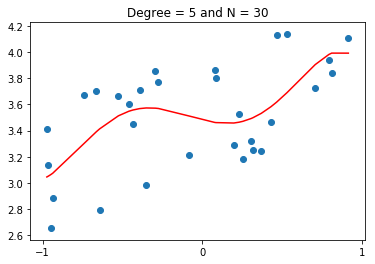

In [45]:
# Scatter plot with polynomial line
plt.scatter(df_3.x,df_3.y)
plt.plot(df_3.x, np.polyval(n30,df_3.x), 'r-')
plt.title("Degree = 5 and N = 30")
plt.xticks([-1,0,1])

#### 40 DATA POINTS

In [46]:
# Created a new data frame 40 points
df_4 = p40.sort_values("x").reset_index()
df_4 = df_4.drop(["index"], axis = 1)
df_4.head()

,x,y
0,-0.974404,3.410058
1,-0.965677,3.139740
2,-0.951403,2.654285
3,-0.937780,2.887960
4,-0.852108,3.346032


In [47]:
# fit of the polynomial line
n40 = np.polyfit(df_4.x, df_4.y,5)
n40

array([-0.79569059, -0.56192762,  1.38401381,  0.48337394, -0.21816782,
        3.46618061])

([<matplotlib.axis.XTick at 0x110305048>,
 <a list of 3 Text xticklabel objects>)

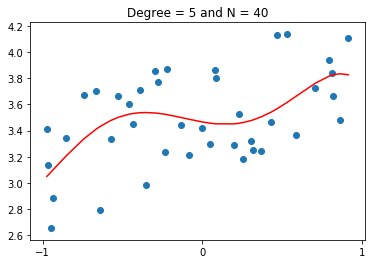

In [48]:
# Scatter plot with polynomial line
plt.scatter(df_4.x,df_4.y)
plt.plot(df_4.x, np.polyval(n40,df_4.x), 'r-')
plt.title("Degree = 5 and N = 40")
plt.xticks([-1,0,1])

#### 50 DATA POINTS

In [49]:
# Created a new data frame 50 points
df_5 = p50.sort_values("x").reset_index()
df_5 = df_5.drop(["index"], axis = 1)
df_5.head()

,x,y
0,-0.974404,3.410058
1,-0.965677,3.139740
2,-0.951403,2.654285
3,-0.937780,2.887960
4,-0.936290,3.587342


In [50]:
# fit of the polynomial line
n50 = np.polyfit(df_5.x, df_5.y,5)
n50

array([-0.9246791 , -0.31557974,  1.46881051,  0.29759754, -0.18177277,
        3.48097903])

([<matplotlib.axis.XTick at 0x11035d3c8>,
 <a list of 3 Text xticklabel objects>)

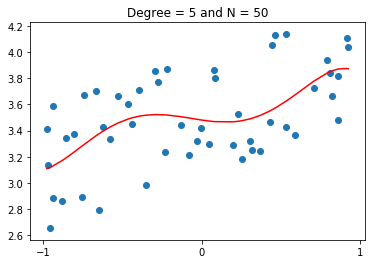

In [51]:
# Scatter plot with polynomial line
plt.scatter(df_5.x,df_5.y)
plt.plot(df_5.x, np.polyval(n50,df_5.x), 'r-')
plt.title("Degree = 5 and N = 50")
plt.xticks([-1,0,1])